In [2]:
import pandas as pd
import matplotlib.pyplot as plt

task1 = pd.read_csv("/content/spotify-2023.csv", encoding="latin-1")
task1

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
artist_month_count = task1.groupby(['artist(s)_name', 'released_month']).size().reset_index(name='Count')

# Find the artist with the most releases in a month
most_releases = artist_month_count.sort_values(by='Count', ascending=False).head(1)

print("Artist with the most releases in a month:")
print(most_releases)

Artist with the most releases in a month:
    artist(s)_name  released_month  Count
608            SZA              12     18


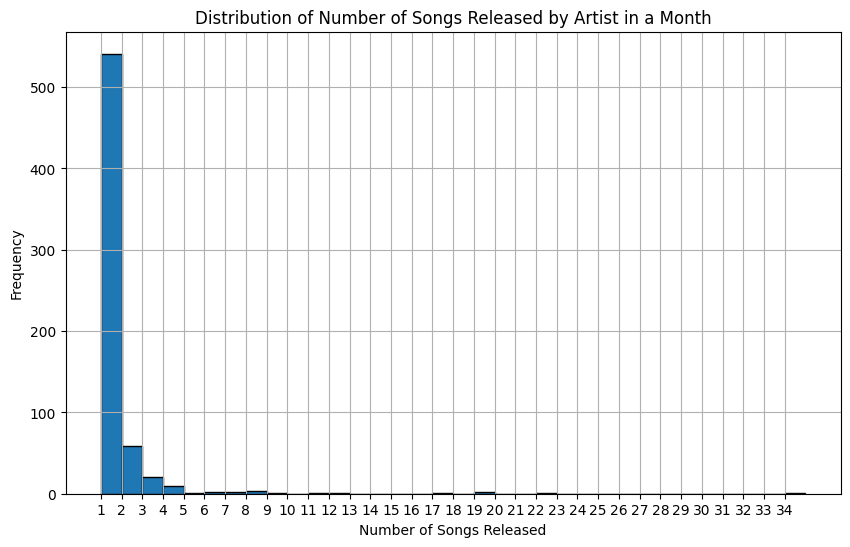

In [ ]:
import matplotlib.pyplot as plt
task1['released_day'] = pd.to_datetime(task1['released_day'])

# Extract month and year
task1['released_month'] = task1['released_day'].dt.strftime('%Y-%m')

# Group by Artist and Month, count the number of releases
artist_month_count = task1.groupby(['artist(s)_name', 'released_month']).size().reset_index(name='Count')

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(artist_month_count['Count'], bins=range(1, max(artist_month_count['Count']) + 2), edgecolor='black')
plt.xlabel('Number of Songs Released')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Songs Released by Artist in a Month')
plt.xticks(range(1, max(artist_month_count['Count']) + 1))
plt.grid(True)
plt.show()

In [4]:
# Group by Artist and Year, count the number of releases
artist_year_count = task1.groupby(['artist(s)_name', 'released_year']).size().reset_index(name='Count')

# Find the artist with the most releases in a year
most_releases_year = artist_year_count.sort_values(by='Count', ascending=False).iloc[0]

print("Artist with the most releases in the Year column:")
print(most_releases_year)

Artist with the most releases in the Year column:
artist(s)_name     SZA
released_year     2022
Count               17
Name: 579, dtype: object


In [6]:
# Group by Artist and Year, count the number of releases
artist_year_count = task1.groupby(['artist(s)_name', 'released_year']).size().reset_index(name='Count')

# Find the artist with the most releases in a year
most_releases_year = artist_year_count.sort_values(by='Count', ascending=False).iloc[0]

# Filter data for the artist with the most releases in the year
top_artist = most_releases_year['artist(s)_name']
artist_data = task1[task1['artist(s)_name'] == top_artist]

# Group by Month, count the number of releases
artist_month_count = artist_data.groupby('released_month').size().reset_index(name='Count')

# Display months and number of releases for the top artist
print("Months and Number of Releases for", top_artist)
print(artist_month_count)

Months and Number of Releases for SZA
   released_month  Count
0              10      1
1              12     18


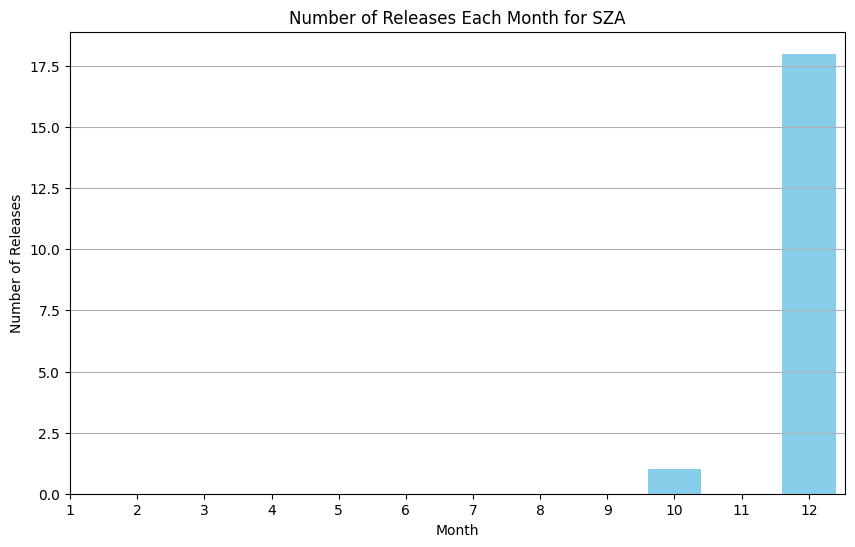

In [7]:
top_artist = most_releases_year['artist(s)_name']
artist_data = task1[task1['artist(s)_name'] == top_artist]

# Group by Month, count the number of releases
artist_month_count = artist_data.groupby('released_month').size().reset_index(name='Count')

# Visualization - Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(artist_month_count['released_month'], artist_month_count['Count'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Number of Releases Each Month for {}'.format(top_artist))
plt.xticks(range(1, 13))  # Assuming month numbers are 1 to 12
plt.grid(axis='y')
plt.show()